In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

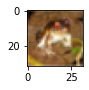

In [4]:
plt.figure(figsize = (1,2))

plt.imshow(X_train[0])

In [5]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship', 'truck']

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (1,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])    

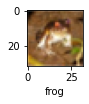

In [10]:
plot_sample(X_train, y_train, 0)

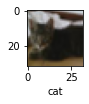

In [11]:
plot_sample(X_train, y_train, 9)

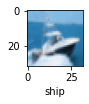

In [12]:
plot_sample(X_train, y_train, 8)

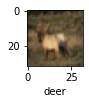

In [13]:
plot_sample(X_train, y_train, 3)

In [14]:
X_train = X_train/ 255
X_test = X_test/ 255

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid'),
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 3, validation_data = (X_test, y_test))

Epoch 1/3
1563/1563 [==============================] - 48s 31ms/step - loss: 1.9294 - accuracy: 0.3072 - val_loss: 1.7279 - val_accuracy: 0.3767
Epoch 2/3
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6522 - accuracy: 0.4182 - val_loss: 1.5929 - val_accuracy: 0.4274
Epoch 3/3
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5524 - accuracy: 0.4502 - val_loss: 1.5235 - val_accuracy: 0.4489


In [16]:
from sklearn.metrics import classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.41      0.50      1000
           1       0.47      0.68      0.56      1000
           2       0.31      0.40      0.35      1000
           3       0.35      0.29      0.32      1000
           4       0.51      0.22      0.31      1000
           5       0.36      0.39      0.37      1000
           6       0.46      0.56      0.51      1000
           7       0.56      0.48      0.52      1000
           8       0.44      0.75      0.55      1000
           9       0.62      0.30      0.41      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



In [17]:
y_pred_classes[0:5]

[3, 8, 8, 8, 4]

## CNN

In [20]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #Ann
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1902 - accuracy: 0.1898 - val_loss: 1.8354 - val_accuracy: 0.3415
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7236 - accuracy: 0.3809 - val_loss: 1.5592 - val_accuracy: 0.4357
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5290 - accuracy: 0.4500 - val_loss: 1.5136 - val_accuracy: 0.4602
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4092 - accuracy: 0.4979 - val_loss: 1.3378 - val_accuracy: 0.5305
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3226 - accuracy: 0.5336 - val_loss: 1.3556 - val_accuracy: 0.5227
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2482 - accuracy: 0.5558 - val_loss: 1.3392 - val_accuracy: 0.5226
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1917 - accuracy: 0.5811 - val_loss: 1.1961 -

In [21]:
y_pred_ccn = cnn.predict(X_test)

y_pred_ccn[:5]

array([[4.54096720e-02, 2.22880882e-03, 2.62602065e-02, 3.37321639e-01,
        7.44133536e-03, 6.80702999e-02, 4.48042572e-01, 9.08200804e-04,
        6.20830134e-02, 2.23420886e-03],
       [5.42268679e-02, 3.30847859e-01, 9.58966048e-05, 1.23779628e-05,
        4.47190141e-05, 6.02645628e-07, 3.34506658e-05, 1.87560988e-06,
        5.71538568e-01, 4.31978181e-02],
       [1.13245934e-01, 4.07729119e-01, 1.03109877e-03, 8.89217481e-04,
        2.57782667e-04, 2.01840434e-04, 5.63805632e-04, 5.47286072e-05,
        4.55437213e-01, 2.05892455e-02],
       [6.80558324e-01, 7.20380768e-02, 7.47756846e-03, 2.51096761e-04,
        1.79840869e-03, 9.90040644e-06, 1.12539553e-03, 2.66471288e-05,
        2.31355175e-01, 5.35952067e-03],
       [2.51779798e-03, 5.35860332e-03, 4.74884287e-02, 3.84273306e-02,
        6.52237773e-01, 7.92938750e-03, 2.41710439e-01, 3.88123008e-04,
        2.76974309e-03, 1.17240380e-03]], dtype=float32)

In [23]:
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_ccn]

y_pred_cnn_classes[:5]

[6, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [25]:
print(classification_report(y_test, y_pred_cnn_classes))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1000
           1       0.53      0.88      0.66      1000
           2       0.56      0.37      0.44      1000
           3       0.52      0.27      0.36      1000
           4       0.63      0.39      0.48      1000
           5       0.65      0.34      0.45      1000
           6       0.46      0.85      0.60      1000
           7       0.69      0.58      0.63      1000
           8       0.71      0.70      0.70      1000
           9       0.53      0.63      0.58      1000

    accuracy                           0.57     10000
   macro avg       0.59      0.57      0.56     10000
weighted avg       0.59      0.57      0.56     10000

